# DOC 8

## Problema 4

Primero importamos los paquetes que vamos a necesitar, unos pocos:

In [1]:
import numpy as np

# Las Ecuaciones Diferenciales
from doc.dynamics import euler_freetorque_eq as f_omega
from doc.kinematics import kin_sec as f_angulos

# El integrador
from doc.integrators import euler_explicito, rk4

# Para hacer los plots luego
%matplotlib inline
# %matplotlib widget
import matplotlib.pyplot as plt

Declaramos la matriz de inercia y los valores iniciales:

In [2]:
# Matriz de inercia.
inertia = np.zeros((3, 3))
inertia[0, 0] = 210e0
inertia[1, 1] = 200e0
inertia[2, 2] = 118e0

# Velocidad angular inicial y ángulos de Euler iniciales.
omega_inicial = [0.05, 0.02, -0.02]
angulos_iniciales = [0e0, 0e0, 0e0]

# Integramos a la vez la velocidad angular y los ángulos.
u0 = np.array(omega_inicial + angulos_iniciales)

Definimos la ecuación diferencial como combinación de la ecuación diferencial de la dinámica (ecuaciones de Euler) y la ecuación diferencial de la cinemática de los ángulos de Euler.

Las ecuaciones se juntan según el vector *u*: la derivada de $\omega$ va primero, seguido de $\dot\theta_1$, $\dot\theta_2$ y $\dot\theta_3$:

In [3]:
def f_integrar(u, t):
    omega = u[0:3]
    angulos = u[3:6]
    t1, t2, t3 = angulos[0], angulos[1], angulos[2]
    f1 = f_omega(inertia, omega)
    f2 = f_angulos(omega, [3, 2, 1], t1, t2, t3)
    return np.concatenate((f1, f2))

Definimos los parámetros de la simulación:

In [4]:
# Parámetros temporales.
t0 = 0e0  # Tiempo inicial [s].
dt = 1e-2  # Inc. de tiempo [s].
tf = 1e2  # Tiempo final [s].

# Parámetros de almacén de soluciones.
n_max = 100  # Número de puntos a guardar.
ts = np.linspace(0e0, tf, n_max)  # Tiempos en los que se guarda valores [s].
us = np.zeros((n_max, 6))  # Almacén de valores del vector de estado u.
us[0, :] = u0  # Almacén del primer valor.

Integración con Euler explícito:

In [5]:
# euler_explicito(ts, us, f_integrar, dt)
rk4(ts, us, f_integrar, dt)

Al final ploteamos el resultado final.

Una cosa, Salvatore numera los ángulos de Euler por su eje:

| Nombre real | Eje de Giro | Nomencatura Salvatore | Nomenclatura Imanol |
|:-----------:|:-----------:|:---------------------:|:-------------------:|
| Yaw         | Z           | $\theta_3$            | $\theta_1$          |
| Pitch       | Y           | $\theta_2$            | $\theta_2$          |
| Roll        | X           | $\theta_1$            | $\theta_3$          |

La de Salvatore es más intuitiva, pero si no son giros 3-2-1, mi nomenclatura te dice que el primer giro se hace con $\theta_1$, luego dos, y tres. Las variables de la leyenda se muestran según **nomenclatura Salvatore**.

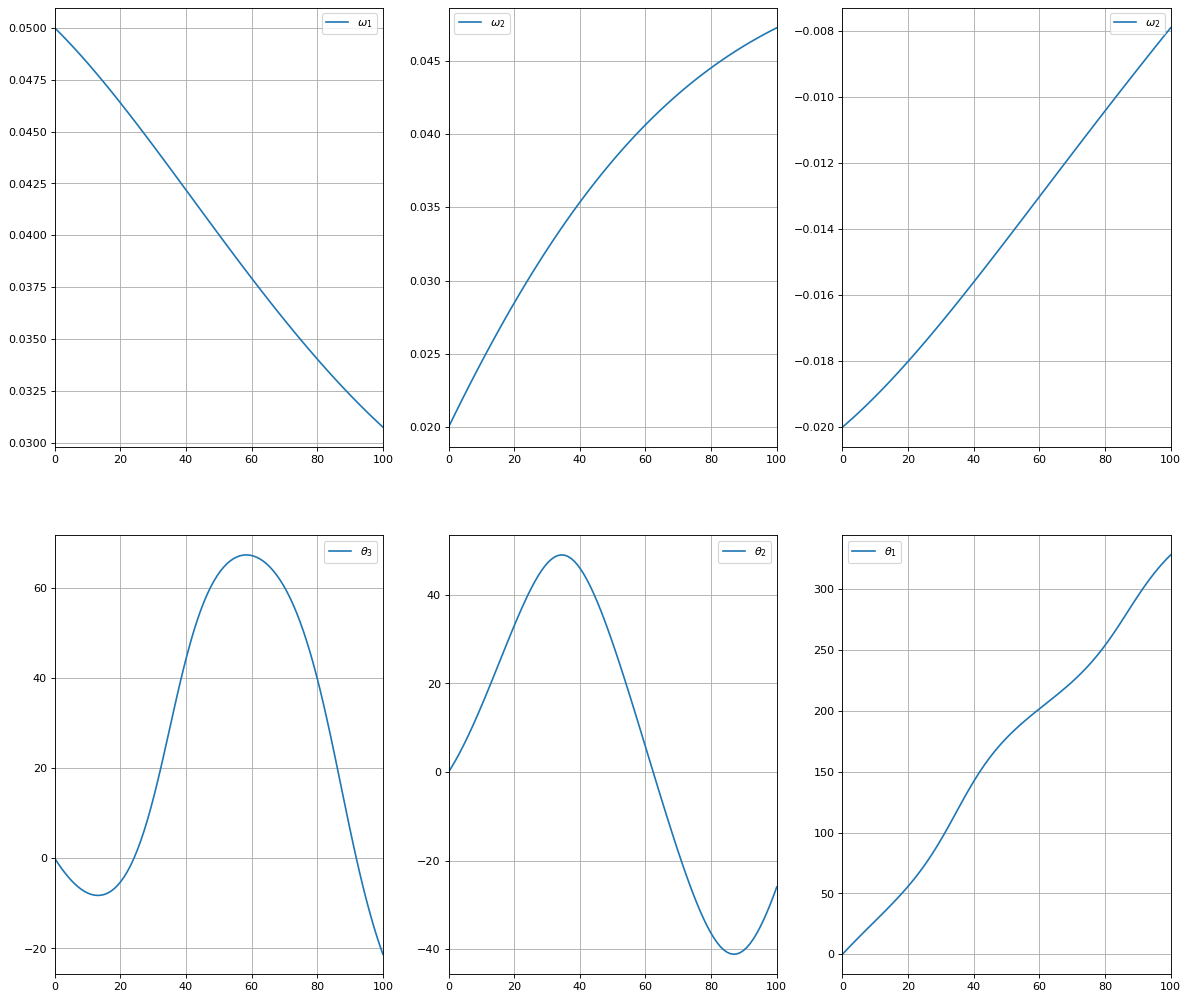

In [6]:
l = ["$\omega_1$", "$\omega_2$", "$\omega_2$", "$\\theta_3$", "$\\theta_2$", "$\\theta_1$"]

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots(2, 3)

#f = plt.subplots(2, 3)

for ii in range(1, 7):
    plt.subplot(2, 3, ii)
    plt.plot(ts, us[:, ii - 1], label=l[ii-1])
    plt.xlim([0e0, 100e0])
    plt.grid(True)
    plt.legend()
    # plt.title(l[ii-1])
    pass

plt.show()